In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%reload_ext autoreload
%autoreload 2
pd.set_option('mode.chained_assignment', None) #gasenje glupih greski

In [163]:
df1=pd.read_csv('data.csv')
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [164]:
df1.shape

(186850, 6)

In [165]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [166]:
df1.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [167]:
df1=df1.dropna()
df1.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [168]:
df1.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [169]:
df1['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Product                         355
Name: Product, dtype: int64

In [170]:
df1[df1['Order Date'].str[1:2]=='r']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [171]:
df2=df1[df1['Order Date'].str[1:2]!='r']

In [172]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [173]:
df2['Order Date']=pd.to_datetime(df2['Order Date'])
df2['Month']=pd.to_datetime(df2['Order Date']).dt.month
df2['Year']=pd.to_datetime(df2['Order Date']).dt.year
df2['Day']=pd.to_datetime(df2['Order Date']).dt.day
df2['Weekday']=pd.to_datetime(df2['Order Date']).dt.weekday
df2['Hour']=pd.to_datetime(df2['Order Date']).dt.hour

In [174]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Day,Weekday,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,19,4,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,7,6,22
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,12,4,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,12,4,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019,30,1,9


In [175]:
df2['Quantity Ordered']=df2['Quantity Ordered'].astype('int32')
df2['Price Each']=df2['Price Each'].astype('float')

In [176]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
 7   Year              185950 non-null  int64         
 8   Day               185950 non-null  int64         
 9   Weekday           185950 non-null  int64         
 10  Hour              185950 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(5), object(3)
memory usage: 16.3+ MB


In [177]:
df2['Sales']=(df2['Quantity Ordered'] * df2['Price Each']).round(2)

In [178]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Day,Weekday,Hour,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,19,4,8,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,7,6,22,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,12,4,14,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,12,4,14,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019,30,1,9,11.99


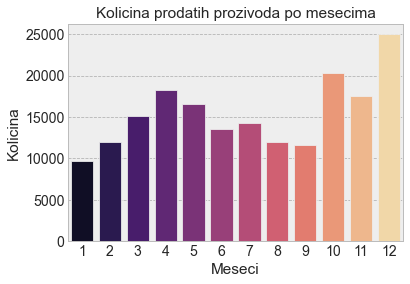

<Figure size 2520x720 with 0 Axes>

In [179]:
sns.countplot(x='Month',data=df2,palette='magma')
plt.title('Kolicina prodatih prozivoda po mesecima')
plt.ylabel('Kolicina')
plt.xlabel('Meseci')
plt.figure(figsize=(35,10))
sns.set_context('paper',font_scale=1.6)

In [180]:
df2_month_sales_count=df2.groupby(["Month"])["Sales"].count()
df2_month_sales_count=pd.DataFrame(data=df2_month_sales)
df2_month_sales_count.head(12)

,Sales
Month,
1,1.822257e+06
2,2.202022e+06
3,2.807100e+06
4,3.390670e+06
5,3.152607e+06
6,2.577802e+06
7,2.647776e+06
8,2.244468e+06
9,2.097560e+06


In [181]:
df2_month_sales_sum=df2.groupby(["Month"])["Sales"].sum()
df2_month_sales=pd.DataFrame(data=df2_month_sales_sum)
df2_month_sales.head(12)

,Sales
Month,
1,1.822257e+06
2,2.202022e+06
3,2.807100e+06
4,3.390670e+06
5,3.152607e+06
6,2.577802e+06
7,2.647776e+06
8,2.244468e+06
9,2.097560e+06


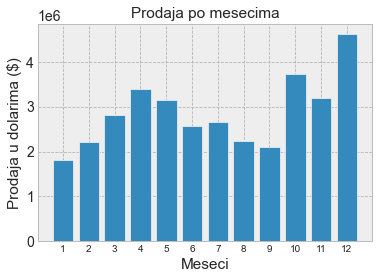

<Figure size 1440x648 with 0 Axes>

In [182]:
keys = [city for city, df in df2.groupby(['Month'])]

plt.bar(keys,df2.groupby(['Month']).sum()['Sales'])
plt.title('Prodaja po mesecima')
plt.ylabel('Prodaja u dolarima ($)')
plt.xlabel('Meseci')
plt.xticks(keys, size=10)
plt.figure(figsize=(20,9))
plt.show()

In [183]:
df_sales_product=df2.groupby(["Product"])["Sales"].sum()
df_sales_product=pd.DataFrame(data=df_sales_product)
df_sales_product.head(12)

,Sales
Product,
20in Monitor,454148.71
27in 4K Gaming Monitor,2435097.56
27in FHD Monitor,1132424.50
34in Ultrawide Monitor,2355558.01
AA Batteries (4-pack),106118.40
AAA Batteries (4-pack),92740.83
Apple Airpods Headphones,2349150.00
Bose SoundSport Headphones,1345565.43
Flatscreen TV,1445700.00


In [184]:
df_sales_product=df2.groupby(["Product"])["Sales"].count()
df_sales_product=pd.DataFrame(data=df_sales_product)
df_sales_product.head(12)

,Sales
Product,
20in Monitor,4101
27in 4K Gaming Monitor,6230
27in FHD Monitor,7507
34in Ultrawide Monitor,6181
AA Batteries (4-pack),20577
AAA Batteries (4-pack),20641
Apple Airpods Headphones,15549
Bose SoundSport Headphones,13325
Flatscreen TV,4800


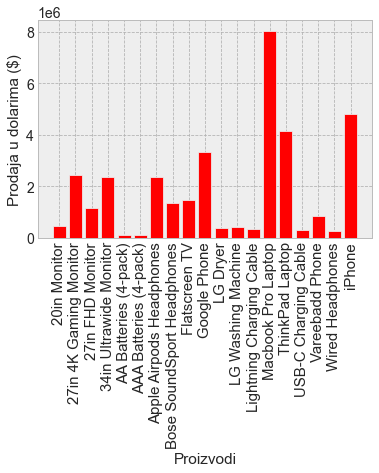

<Figure size 2520x1080 with 0 Axes>

In [185]:
keys = [city for city, df in df2.groupby(['Product'])]

plt.bar(keys,df2.groupby(['Product']).sum()['Sales'],color='red')
plt.ylabel('Prodaja u dolarima ($)')
plt.xlabel('Proizvodi')
plt.xticks(keys, rotation='vertical', size=15,)
plt.figure(figsize=(35,15))
plt.show()

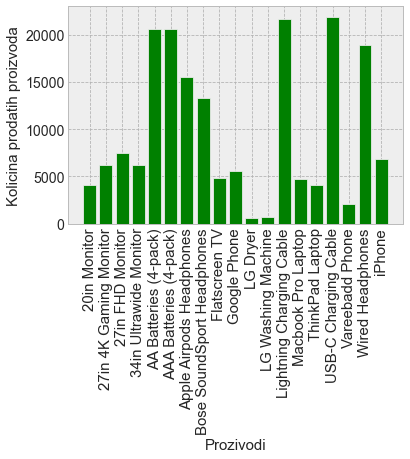

<Figure size 2520x1080 with 0 Axes>

In [186]:
keys = [city for city, df in df2.groupby(['Product'])]

plt.bar(keys,df2.groupby(['Product']).count()['Sales'],color='green')
plt.ylabel('Kolicina prodatih proizvoda',size=15)
plt.xlabel('Prozivodi',size=15)

plt.xticks(keys, rotation='vertical', size=15,)
plt.figure(figsize=(35,15))
plt.show()

In [187]:
df2.groupby("Product")['Sales'].agg(['count','mean','max','min'])

,count,mean,max,min
Product,,,,
20in Monitor,4101,110.740968,219.98,109.99
27in 4K Gaming Monitor,6230,390.866382,779.98,389.99
27in FHD Monitor,7507,150.849141,299.98,149.99
34in Ultrawide Monitor,6181,381.096588,759.98,379.99
AA Batteries (4-pack),20577,5.157137,26.88,3.84
AAA Batteries (4-pack),20641,4.493040,26.91,2.99
Apple Airpods Headphones,15549,151.080455,450.00,150.00
Bose SoundSport Headphones,13325,100.980520,299.97,99.99
Flatscreen TV,4800,301.187500,600.00,300.00


In [188]:
df2['City']=df2['Purchase Address'].apply(lambda x: x.split(',')[1] +" " + x.split(',')[2].split(" ")[1])
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Day,Weekday,Hour,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,19,4,8,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,7,6,22,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,12,4,14,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,12,4,14,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019,30,1,9,11.99,Los Angeles CA


In [189]:
df2['City'].value_counts()

 San Francisco CA    44732
 Los Angeles CA      29605
 New York City NY    24876
 Boston MA           19934
 Atlanta GA          14881
 Dallas TX           14820
 Seattle WA          14732
 Portland OR         10010
 Austin TX            9905
 Portland ME          2455
Name: City, dtype: int64

In [190]:
df2.groupby("City")['Sales'].agg(['count','mean','max','min'])

,count,mean,max,min
City,,,,
Atlanta GA,14881,187.856903,1700.0,2.99
Austin TX,9905,183.703357,1700.0,2.99
Boston MA,19934,183.688272,3400.0,2.99
Dallas TX,14820,186.772969,1700.0,2.99
Los Angeles CA,29605,184.177362,1700.0,2.99
New York City NY,24876,187.502711,3400.0,2.99
Portland ME,2455,183.200925,1700.0,2.99
Portland OR,10010,186.886348,1700.0,2.99
San Francisco CA,44732,184.704550,3400.0,2.99


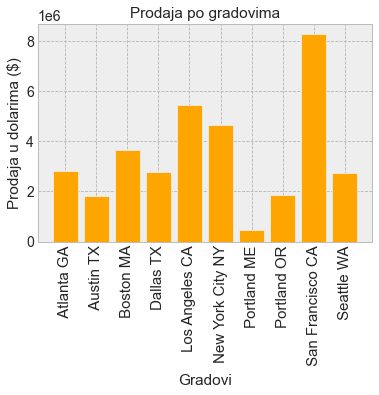

<Figure size 1440x648 with 0 Axes>

In [191]:
keys = [city for city, df in df2.groupby(['City'])]

plt.bar(keys,df2.groupby(['City']).sum()['Sales'],color='orange')
plt.title('Prodaja po gradovima')
plt.ylabel('Prodaja u dolarima ($)')
plt.xlabel('Gradovi')
plt.xticks(keys, rotation='vertical', size=15,)
plt.figure(figsize=(20,9))
plt.show()

In [192]:
df2.groupby("Hour")['Sales'].agg(['count','mean','max','min','sum'])

,count,mean,max,min,sum
Hour,,,,,
0,3910,182.537409,1700.00,2.99,713721.27
1,2350,196.113566,1700.00,2.99,460866.88
2,1243,188.939212,1700.00,2.99,234851.44
3,831,175.400590,1700.00,2.99,145757.89
4,854,190.469567,1700.00,2.99,162661.01
5,1321,174.625148,1700.00,2.99,230679.82
6,2482,180.545125,1700.00,2.99,448113.00
7,4011,185.702847,1700.00,2.99,744854.12
8,6256,190.592866,1700.00,2.99,1192348.97


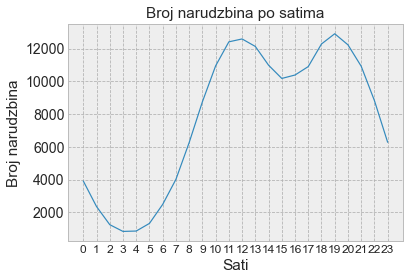

In [193]:
df2['Count'] = 1
keys = [pair for pair, df in df2.groupby(['Hour'])]

plt.plot(keys, df2.groupby(['Hour']).count()['Count'])
plt.title('Broj narudzbina po satima')
plt.xticks(keys,size=12)
plt.xlabel('Sati')
plt.ylabel('Broj narudzbina')
plt.style.use('bmh')

In [194]:
def najprodavaniji_proizvod(x):
    df23=df2[df2['City']==x]
    s1=df23['Product'].value_counts()
    s1=pd.DataFrame(data=s1)
    return s1[0:2]

In [195]:
najprodavaniji_proizvod(' Los Angeles CA')

,Product
Lightning Charging Cable,3512
USB-C Charging Cable,3454


In [196]:
naj_proizvod(' San Francisco CA')

,Product
USB-C Charging Cable,5368
Lightning Charging Cable,5174


In [197]:
naj_proizvod(' New York City NY')

,Product
USB-C Charging Cable,2978
Lightning Charging Cable,2861


In [198]:
naj_proizvod(' Boston MA')

,Product
USB-C Charging Cable,2333
Lightning Charging Cable,2323


In [199]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df3=df2.copy()
df3['City']=le.fit_transform(df3['City'])
df3['Product']=le.fit_transform(df3['Product'])

In [200]:
df2['City'].value_counts()

 San Francisco CA    44732
 Los Angeles CA      29605
 New York City NY    24876
 Boston MA           19934
 Atlanta GA          14881
 Dallas TX           14820
 Seattle WA          14732
 Portland OR         10010
 Austin TX            9905
 Portland ME          2455
Name: City, dtype: int64

In [201]:
df3['City'].value_counts()

8    44732
4    29605
5    24876
2    19934
0    14881
3    14820
9    14732
7    10010
1     9905
6     2455
Name: City, dtype: int64

In [202]:
df2['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [203]:
df3['Product'].value_counts()

15    21903
12    21658
5     20641
4     20577
17    18882
6     15549
7     13325
2      7507
18     6842
1      6230
3      6181
9      5525
8      4800
13     4724
14     4128
0      4101
16     2065
11      666
10      646
Name: Product, dtype: int64

In [204]:
X=df3[['City','Product','Quantity Ordered']]
y=pd.to_numeric(df3['Sales']).astype('int32')

In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [206]:
from sklearn.naive_bayes import GaussianNB
model =GaussianNB()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9724926055391234

In [207]:
model.predict([[8,18,2]])

array([1400])

In [208]:
def prodaja(grad,proizvod,kolicina):
    if grad == 4:
        grad1=print('Grad : Los Angeles CA'),
    elif grad == 8:
            grad1=print('Grad : San Francisco CA'),
    elif grad == 5:
            grad1=print('Grad : New York City NY'),
    elif grad == 2:
            grad1=print('Grad : Boston MA'),
    elif grad == 0:
            grad1=print('Grad : Atlanta GA'),
    elif grad == 3:
            grad1=print('Grad : Dallas TX'),
    elif grad == 7:
            grad1=print('Grad : Portland OR'),
    elif grad == 9:
            grad1=print('Grad : Seattle WA'),
    elif grad == 1:
            grad1=print('Grad : Austin TX'),
    elif grad == 6:
            grad1=print('Grad : Portland MN'),
    
    
    if proizvod == 15:
        grad1=print('Proizvod : USB-C Charging Cable '),
    elif proizvod == 12:
            grad1=print('Prozivod : Lightning Charging Cable '),
    elif proizvod == 5:
            grad1=print('Proizvod : AAA Batteries'),
    elif proizvod == 4:
            grad1=print('Proizvod : AA Batteries'),
    elif proizvod == 17:
            grad1=print('Proizvod : Wired Headphones'),
    elif proizvod == 6:
            grad1=print('Proizvod : Apple Airpods Headphones'),
    elif proizvod == 7:
            grad1=print('Proizvod : Bose SoundSport Headphones'),
    elif proizvod == 2:
            grad1=print('Proizvod : 27in FHD Monitor'),
    elif proizvod == 18:
            grad1=print('Proizvod : iPhone'),
    elif proizvod == 1:
            grad1=print('Proizvod : 27in 4K Gaming Monitor'),
    elif proizvod == 3:
            grad1=print('Proizvod : 34in Ultrawide Monitor'),
    elif proizvod == 9:
            grad1=print('Proizvod : Google Phone'),
    elif proizvod == 8:
            grad1=print('Proizvod : Flatscreen TV'),
    elif proizvod == 13:
            grad1=print('Proizvod : Macbook Pro Laptop'),
    elif proizvod == 14:
            grad1=print('Proizvod : ThinkPad Laptop'),
    elif proizvod == 0:
            grad1=print('Proizvod : 20in Monitor'),
    elif proizvod == 16:
            grad1=print('Proizvod : Vareebadd Phone'),
    elif proizvod == 11:
            grad1=print('Proizvod : LG Washing Machine'),
    elif proizvod == 10:
            grad1=print('Proizvod : LG Dryer')
    
    broj=1
    print('Kolicina :'+str(kolicina))
    op = model.predict([[grad,proizvod,broj]])
    return print(f'Vas racun iznosi {op * (kolicina)} dolara ')


In [209]:
prodaja(9,8,3)

Grad : Seattle WA
Proizvod : Flatscreen TV
Kolicina :3
Vas racun iznosi [900] dolara 


In [210]:
prodaja(5,8,10)

Grad : New York City NY
Proizvod : Flatscreen TV
Kolicina :10
Vas racun iznosi [3000] dolara 


In [211]:
prodaja(5,10,1)

Grad : New York City NY
Proizvod : LG Dryer
Kolicina :1
Vas racun iznosi [600] dolara 
